In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [13]:
#Stocks
ticker_list = pd.read_csv('lq45.csv')['Ticker'].tolist()
print(f'Number of stocks:', len(ticker_list))
ticker_list = [ticker + '.JK' for ticker in ticker_list]
#Period
period = '3y'

Number of stocks: 45


In [14]:
import yfinance as yf
df = pd.DataFrame()
for ticker in ticker_list:
    stock = yf.Ticker(ticker)
    print(stock)
    stock_df = stock.history(period=period)
    stock_df['Ticker'] = ticker
    df = pd.concat([df, stock_df])
df.index = pd.to_datetime(df.index, utc=True)
print(df.info())
print('Number of ticker data acquired: ', len(df['Ticker'].unique()))

yfinance.Ticker object <ACES.JK>
yfinance.Ticker object <ADRO.JK>
yfinance.Ticker object <AKRA.JK>
yfinance.Ticker object <AMRT.JK>
yfinance.Ticker object <ANTM.JK>
yfinance.Ticker object <ARTO.JK>
yfinance.Ticker object <ASII.JK>
yfinance.Ticker object <BBCA.JK>
yfinance.Ticker object <BBNI.JK>
yfinance.Ticker object <BBRI.JK>
yfinance.Ticker object <BBTN.JK>
yfinance.Ticker object <BMRI.JK>
yfinance.Ticker object <BRIS.JK>
yfinance.Ticker object <BRPT.JK>
yfinance.Ticker object <BUKA.JK>
yfinance.Ticker object <CPIN.JK>
yfinance.Ticker object <EMTK.JK>
yfinance.Ticker object <ESSA.JK>
yfinance.Ticker object <EXCL.JK>
yfinance.Ticker object <GOTO.JK>
yfinance.Ticker object <HRUM.JK>
yfinance.Ticker object <ICBP.JK>
yfinance.Ticker object <INCO.JK>
yfinance.Ticker object <INDF.JK>
yfinance.Ticker object <INDY.JK>
yfinance.Ticker object <INKP.JK>
yfinance.Ticker object <INTP.JK>
yfinance.Ticker object <ITMG.JK>
yfinance.Ticker object <JPFA.JK>
yfinance.Ticker object <KLBF.JK>
yfinance.T

In [20]:
df['div yield'] = df['Dividends'] / df['Close']
df[df['div yield'] > 0].groupby('Ticker').mean()['div yield'].sort_values(ascending = False)

Ticker
PTBA.JK    0.123157
ITMG.JK    0.102945
INDY.JK    0.071327
ADRO.JK    0.062672
PGAS.JK    0.060697
UNTR.JK    0.058226
TLKM.JK    0.047651
BMRI.JK    0.046398
INDF.JK    0.044861
INTP.JK    0.042186
JPFA.JK    0.032034
BBRI.JK    0.031929
TINS.JK    0.031804
MEDC.JK    0.030003
ASII.JK    0.029512
ESSA.JK    0.026850
ICBP.JK    0.024914
SMGR.JK    0.023690
BBTN.JK    0.023606
BBNI.JK    0.023380
AKRA.JK    0.023047
SIDO.JK    0.022951
ACES.JK    0.020587
HRUM.JK    0.019841
SRTG.JK    0.019763
TBIG.JK    0.018522
CPIN.JK    0.017338
KLBF.JK    0.015796
UNVR.JK    0.015305
EXCL.JK    0.013661
BRIS.JK    0.012296
SCMA.JK    0.012255
TOWR.JK    0.011841
AMRT.JK    0.011027
BBCA.JK    0.010035
ANTM.JK    0.009231
INCO.JK    0.008639
INKP.JK    0.006184
BRPT.JK    0.003478
TPIA.JK    0.003024
EMTK.JK    0.002740
Name: div yield, dtype: float64

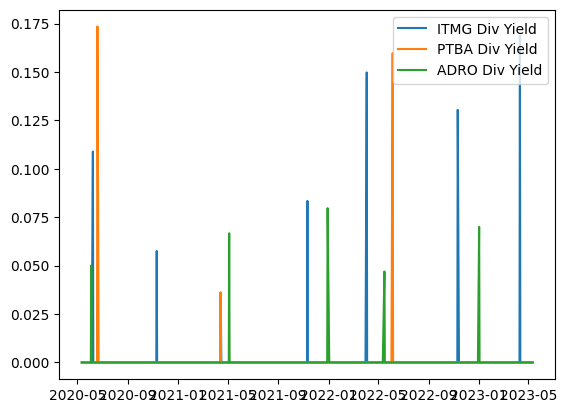

In [19]:
import matplotlib.pyplot as plt
plt.plot(df[df['Ticker'] == 'ITMG.JK']['div yield'], label='ITMG Div Yield')
plt.plot(df[df['Ticker'] == 'PTBA.JK']['div yield'], label='PTBA Div Yield')
plt.plot(df[df['Ticker'] == 'ADRO.JK']['div yield'], label='ADRO Div Yield')
plt.legend()
plt.show()